## Illustrative example of SVD for Image Compression: Interactive Tutorial

What is SVD?  

For a matrix $A$, SVD factorizes it into three matrices:

$$A=U\Sigma V^{T}$$

 
Where:

$U$: left singular vectors  
$\Sigma$: diagonal matrix of singular values  
$V^{T}$: right singular vectors

By truncating the decomposition to only the top $k$ singular values, we can approximate the original matrix with lower rank, compressing the image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
import os
import ipywidgets as widgets
from IPython.display import display, clear_output

In [4]:
# --- Load and preprocess image ---
def load_grayscale_image(image_path, resize_shape=(100, 100)):
    img = imread(image_path, as_gray=True)
    img_resized = resize(img, resize_shape, anti_aliasing=True)
    return img_resized

# --- SVD compression ---
def apply_svd(image, k):
    U, S, VT = np.linalg.svd(image, full_matrices=False)
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return np.dot(U_k, np.dot(S_k, VT_k))


def plot_reconstructions(original, reconstructions, components_list):
    n = len(reconstructions)
    plt.figure(figsize=(4 * (n + 1), 4))

    # Plot original
    plt.subplot(1, n + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Plot reconstructions
    for i, (recon, k) in enumerate(zip(reconstructions, components_list)):
        plt.subplot(1, n + 1, i + 2)
        plt.imshow(recon, cmap='gray')
        plt.title(f"{k} components")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# --- Plot function ---
def plot_comparison(original, reconstructed, k):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(f"Reconstructed (k = {k})")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

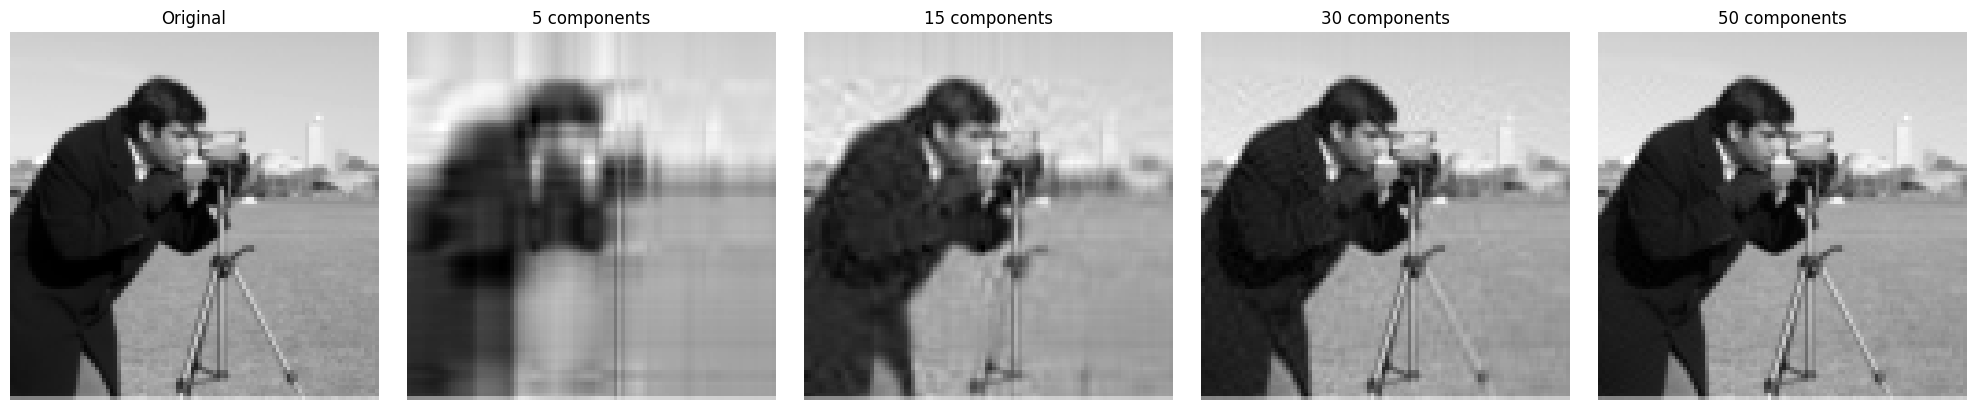

In [5]:
image_path = 'images/05-Image_for_testing.png'  # Replace with your path to an image
resize_shape = (100, 100)      # Resize for speed (adjust as needed)
components_list = [5, 15, 30, 50]  # Try different compression levels

# --- Run the Demo ---
if os.path.exists(image_path):
    original_image = load_grayscale_image(image_path, resize_shape)
    reconstructions = [apply_svd(original_image, k) for k in components_list]
    plot_reconstructions(original_image, reconstructions, components_list)
else:
    print(f"Image not found at {image_path}")

In [6]:
# --- Image path and setup ---
image_path = 'images/05-Image_for_testing.png'  # Replace with your image path
resize_shape = (100, 100)

# Load image
original_image = load_grayscale_image(image_path, resize_shape)

# --- Interactive widget ---
@widgets.interact(k=widgets.IntSlider(min=2, max=min(resize_shape), step=1, value=50, description='Rank k'))
def update_plot(k):
    clear_output(wait=True)
    reconstructed_image = apply_svd(original_image, k)
    plot_comparison(original_image, reconstructed_image, k)

interactive(children=(IntSlider(value=50, description='Rank k', min=2), Output()), _dom_classes=('widget-inter…